# **INFORMASI DATASET**
## Latar Belakang

Industri wine merupakan salah satu sektor dengan pertumbuhan yang stabil dan kompetitif di pasar global. Kualitas wine dipengaruhi oleh berbagai faktor kimia yang kompleks, yang biasanya dinilai oleh para ahli wine (sommelier) secara subjektif. Namun, dengan kemajuan teknologi dan data science, kini kualitas wine juga dapat diprediksi secara objektif menggunakan data kuantitatif dari komposisi kimianya.
Dataset Wine Quality (WineQT.csv) ini merupakan kumpulan data yang berisi hasil pengukuran karakteristik kimia dari sampel wine merah, yang kemudian dinilai kualitasnya dalam bentuk skor numerik. Data ini penting untuk:

*   Menganalisis faktor-faktor utama yang mempengaruhi kualitas wine,
*   Membangun model prediktif untuk memperkirakan skor kualitas wine dari data kimia,
*   Membantu produsen wine dalam proses kontrol kualitas dan optimasi produksi.

##1. **Business** **Understanding**

*  **Permasalahan Bisnis**
- Menjaga kualitas produk tetap sama meskipun bahan baku dan proses produksi berbeda.
- mengidentifikasi karakteristik kimia yang ideal untuk menghasilkan wine berkualitas tinggi.
- Mengurangi ketergantungan pada uji organoleptik manusia yang tidak efisien

*   **Tujuan Bisnis**
- Mengidentifikasi faktor-faktor kimia yang paling mempengaruhi kualitas wine.
- Mengembangkan model prediktif yang mampu memprediksi kualitas wine berdasarkan komposisi kimia.
- Memberikan rekomendasi kepada produsen wine untuk meningkatkan kualitas produk melalui pengendalian atribut kimia tertentu.

*   **Manfaat Bisnis**
- Produksi yang efisien: Mengurangi kebutuhan untuk uji coba manual, yang memakan waktu dan biaya.
- Kontinuitas Produk: Memastikan bahwa standar kualitas wine tetap sama.
- Keunggulan Kompetitif: Peningkatan kualitas yang berkelanjutan akan memberikan keuntungan di pasar.
- Pengambilan Keputusan: Memberikan produsen wine dasar yang berbasis data untuk membuat keputusan.




# **2. DATA UNDERSTANDING**


## Import Library

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # Pipeline khusus imblearn (bukan sklearn!)
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display
from collections import defaultdict
import joblib
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

# Data Loading

Membaca file CSV 'WineQT.csv' dan memuatnya ke dalam DataFrame df menggunakan pandas.

In [89]:
df = pd.read_csv('WineQT.csv')

 Menampilkan 5 baris pertama dari dataset df.

In [90]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Exploratory Data Analysis

Menampilkan informasi ringkas tentang dataset, termasuk jumlah baris, kolom, tipe data untuk setiap kolom, dan jumlah nilai yang tidak kosong.

insight: Dataset ini memiliki 1143 entri dan 13 kolom, dengan tipe data float64 kecuali kolom 'Id' yang bertipe int64. Semua kolom tidak ada nilai kosong, dan kolom 'Id' dihapus karena hanya sebagai pengenal.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Menghapus kolom 'Id' dari dataset df.

insight: dihapus karena berfungsi hanya sebagai pengenal unik yang tidak memberikan informasi analitis yang relevan

In [92]:
df = df.drop(columns=['Id'])

Menghasilkan statistik deskriptif untuk kolom numerik dalam dataset df. Ini mencakup mean, standard deviation, min, max, dan quartile untuk setiap kolom numerik.

insight: Statistik deskriptif menunjukkan nilai rata-rata, standar deviasi, minimum, maksimum, serta kuartil (25%, 50%, 75%) untuk setiap kolom numerik dalam dataset.

In [93]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Menangani Missing Value dan Duplikat data

- Menampilkan pesan untuk memberi tahu bahwa kode berikutnya akan menunjukkan jumlah nilai yang hilang (missing values) per kolom dalam dataset.
- Menampilkan jumlah nilai yang hilang di setiap kolom, memungkinkan kita untuk mengetahui apakah ada kolom yang perlu ditangani karena adanya data yang hilang.
- Membersihkan dataset dengan menghapus baris yang tidak lengkap atau memiliki nilai yang hilang.


insight: Tidak ada nilai yang hilang (missing values) pada kolom manapun dalam dataset, karena hasilnya menunjukkan 0 untuk setiap kolom.

In [94]:
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())
df.dropna(inplace=True)


Jumlah Missing Value per Kolom:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


- Mengidentifikasi apakah ada baris duplikat dalam dataset.
- Menampilkan jumlah data yang terduplikasi.
- Membersihkan dataset dari data duplikat dan menyimpan dataset yang sudah dibersihkan dalam df_cleaned.

insight: Dataset memiliki 125 baris data yang terduplikasi, yang berarti ada duplikat dalam entri data yang perlu dibersihkan.

In [95]:
duplicates = df.duplicated()
print(f"\nJumlah duplikat data: {duplicates.sum()}")
df_cleaned = df.drop_duplicates()


Jumlah duplikat data: 125


- Menampilkan pesan yang memberi tahu bahwa informasi tentang dataset yang telah dibersihkan akan ditampilkan.
- Menampilkan informasi tentang df_cleaned setelah penghapusan nilai yang hilang dan duplikat. Ini mencakup jumlah baris dan kolom serta tipe data setiap kolom.
- Menampilkan jumlah baris yang tersisa setelah menghapus nilai yang hilang dan duplikat.

insight: Setelah duplikasi dihapus, dataset yang telah dibersihkan disimpan ke dalam df_cleaned. Jumlah baris yang tersisa setelah pembersihan adalah 1018, menghilangkan 125 baris duplikat. Dataset yang telah dibersihkan sekarang terdiri dari 1018 entri dengan 12 kolom, dan tidak ada nilai yang hilang maupun duplikat setelah pembersihan dilakukan.

In [96]:
print("\n📊 Informasi Setelah Menghapus Duplikat:")
print(df_cleaned.info())
print(f"Jumlah baris setelah pembersihan: {len(df_cleaned)}")


📊 Informasi Setelah Menghapus Duplikat:
<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1018 non-null   float64
 1   volatile acidity      1018 non-null   float64
 2   citric acid           1018 non-null   float64
 3   residual sugar        1018 non-null   float64
 4   chlorides             1018 non-null   float64
 5   free sulfur dioxide   1018 non-null   float64
 6   total sulfur dioxide  1018 non-null   float64
 7   density               1018 non-null   float64
 8   pH                    1018 non-null   float64
 9   sulphates             1018 non-null   float64
 10  alcohol               1018 non-null   float64
 11  quality               1018 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 103.4 KB
None
Jumlah baris setelah pembersihan: 1018


## Menangani Outliers

mengidentifikasi dan menghapus outliers dari dataset menggunakan metode Interquartile Range (IQR).

insight: outliers dihapus menggunakan metode IQR, mengurangi data menjadi 834 entri. Dataset kini lebih akurat dan siap untuk analisis lebih lanjut.

In [97]:
numeric_cols = df.select_dtypes(include='number').columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[filter_outliers]
print("sebelum menghapus outlier:", df.shape)
print("Ukuran setelah menghapus outlier:", df_cleaned.shape)
df_cleaned.head()

sebelum menghapus outlier: (1143, 12)
Ukuran setelah menghapus outlier: (834, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Menampilkan visualisasi Sebelum dan setyelah pembersihan data
- Boxplot Sebelum Menghapus Outlier memberikan gambaran mengenai sebaran data yang lebih besar dan adanya outliers yang dapat mempengaruhi analisis atau model prediksi.
- Boxplot Setelah Menghapus Outlier menunjukkan bahwa dengan menghapus outliers, distribusi data menjadi lebih rapat dan terstruktur, memberikan dasar yang lebih baik untuk analisis lebih lanjut.

insight: Fungsi plot_boxplots membuat diagram boxplot dari kolom numerik dalam dataset, menyesuaikan tata letak berdasarkan jumlah kolom, dan menampilkan judul yang dapat disesuaikan. Fungsi ini berguna untuk membandingkan distribusi data sebelum dan sesudah penghapusan outlier.

Boxplot Sebelum Menghapus Outlier:


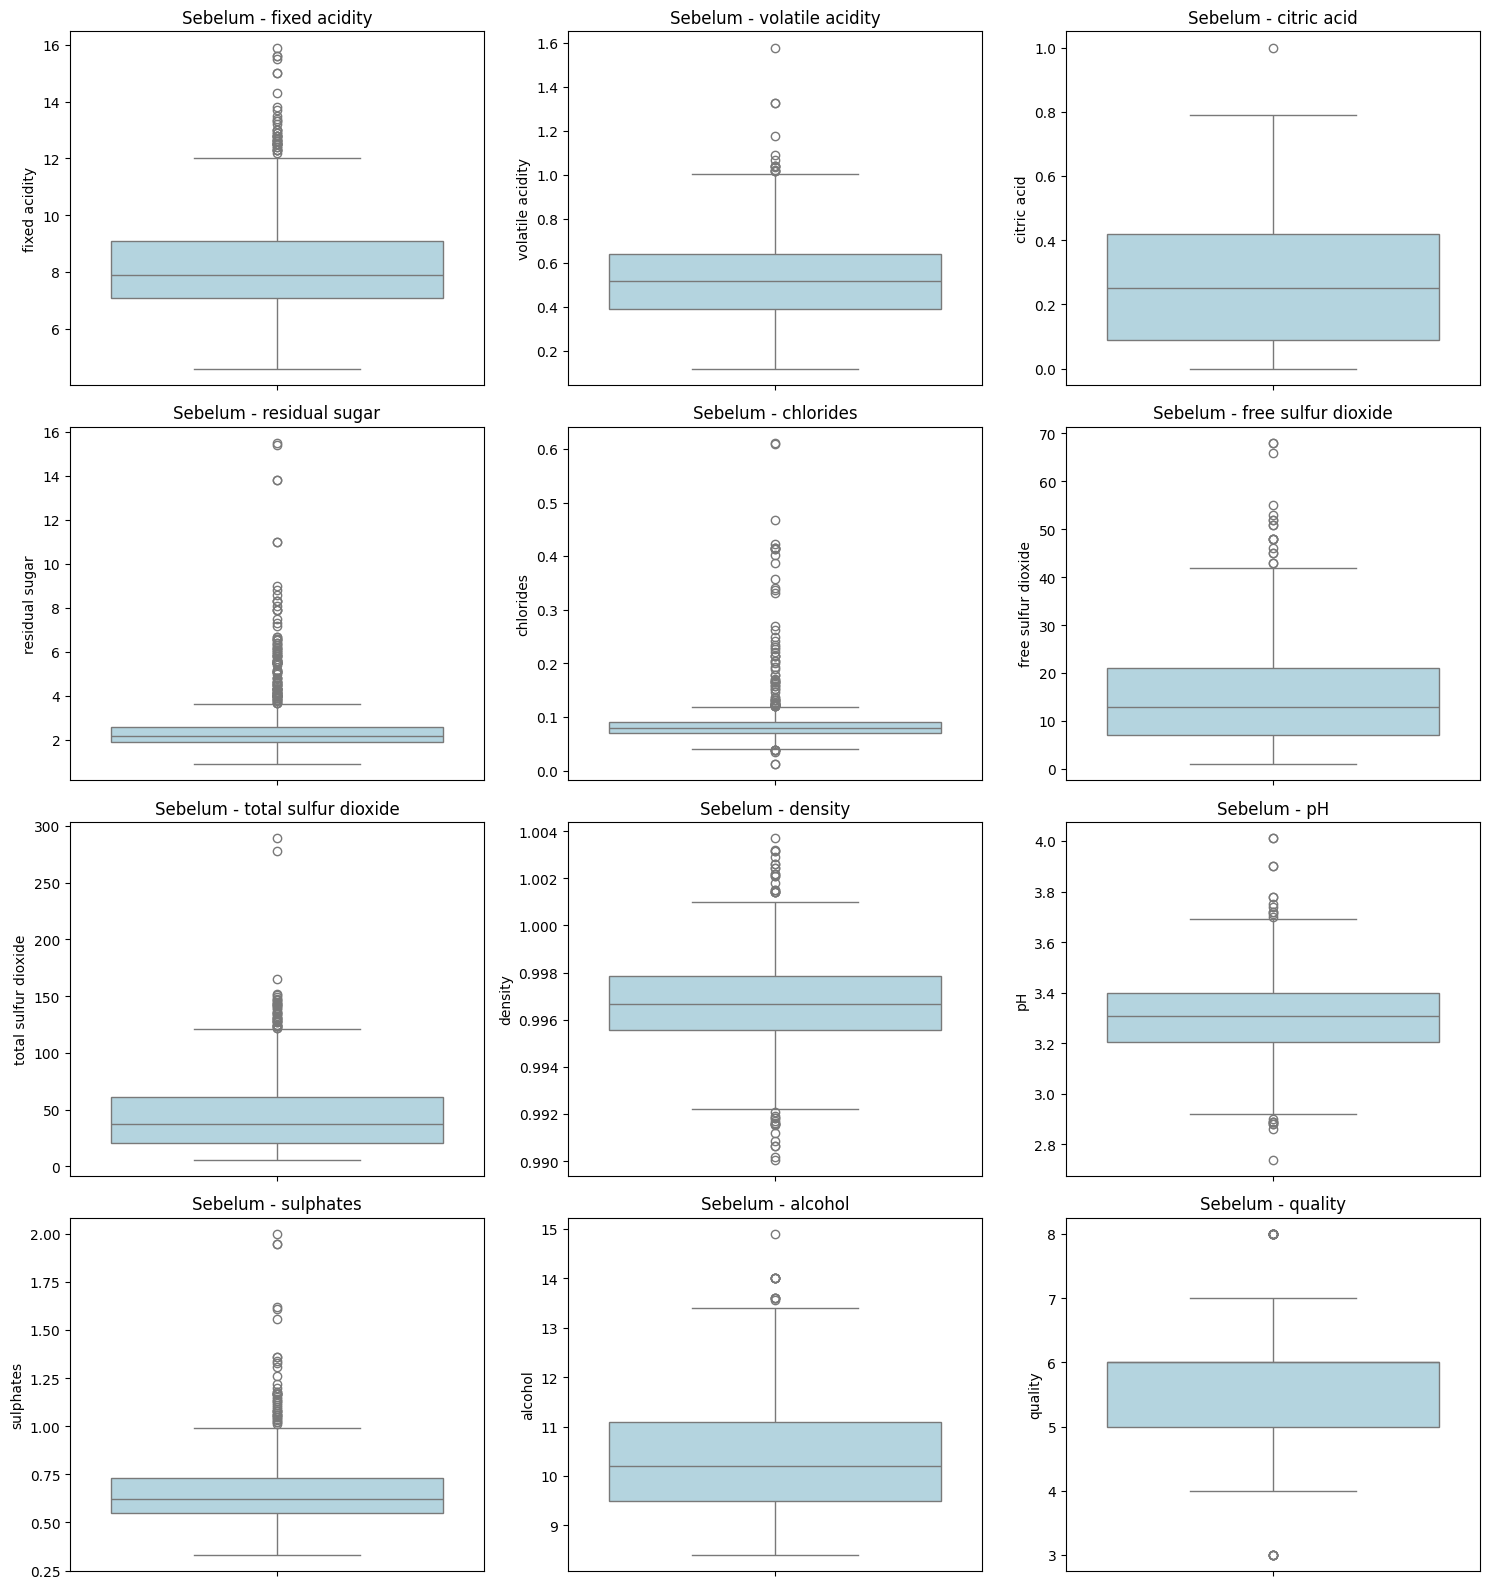

 Boxplot Setelah Menghapus Outlier:


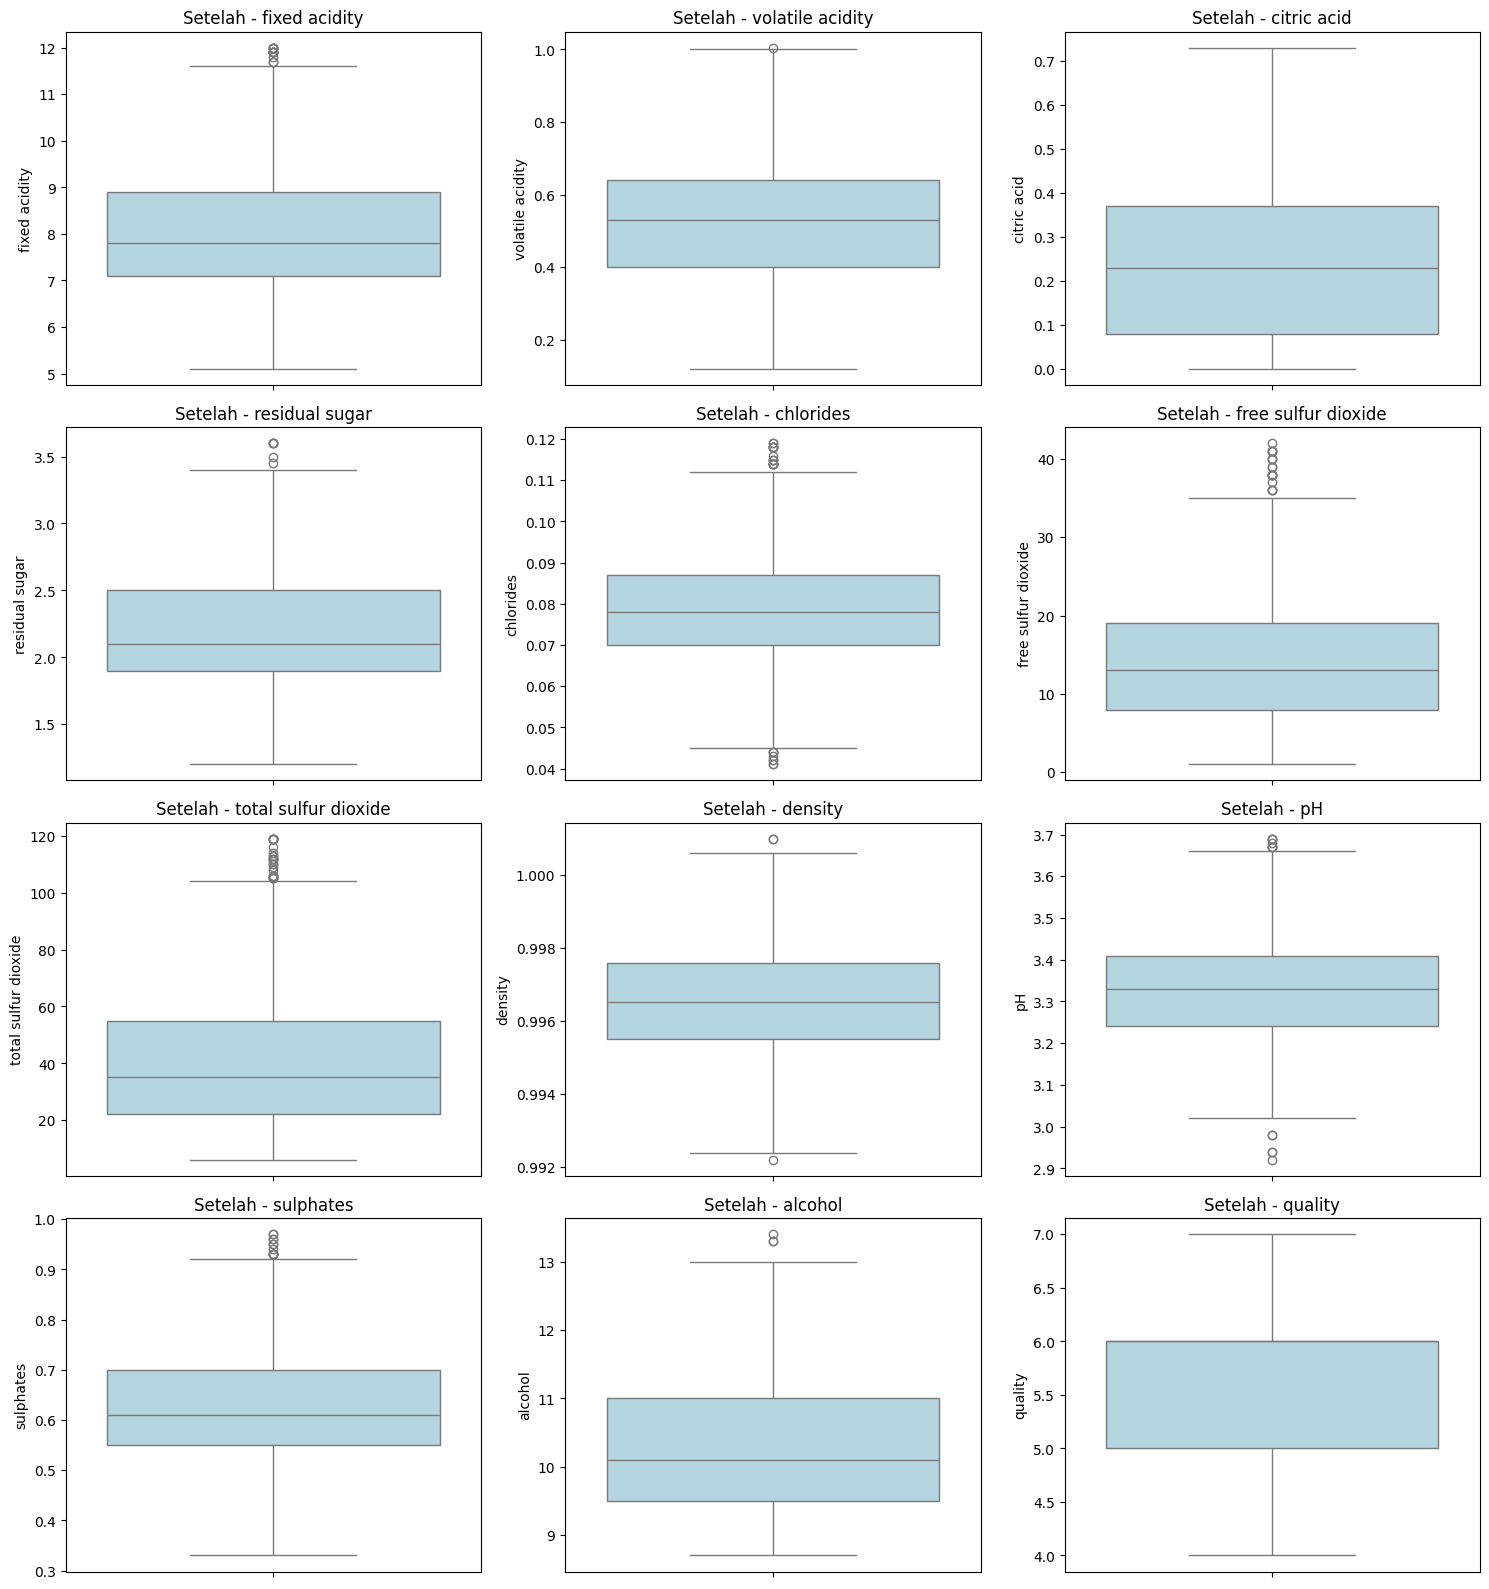

In [98]:
def plot_boxplots(data, title_prefix=""):
    num_cols = data.select_dtypes(include='number').columns
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(y=data[col], color="lightblue")
        plt.title(f"{title_prefix}{col}")
    plt.tight_layout()
    plt.show()

print("Boxplot Sebelum Menghapus Outlier:")
plot_boxplots(df, title_prefix="Sebelum - ")

print(" Boxplot Setelah Menghapus Outlier:")
plot_boxplots(df_cleaned, title_prefix="Setelah - ")

## Univariate Analysis

Menentukan Fitur Numerik dan Target

insight: Baris ini memilih kolom bertipe data int64 atau float64 sebagai fitur numerik dan menyimpannya dalam numerical_features. Kolom target untuk analisis atau model, yaitu quality, disimpan dalam target_feature.

In [99]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_feature = 'quality'

Menampilkan Statistik Deskriptif

insight: Statistik deskriptif dihitung dan ditampilkan untuk semua fitur numerik dalam dataset. Ini mencakup penghitungan nilai seperti rata-rata, standar deviasi, minimum, maksimum, dan kuartil untuk setiap kolom numerik, memberikan gambaran umum tentang distribusi data.

In [100]:
print("Statistik Deskriptif:")
display(df[numerical_features].describe())

Statistik Deskriptif:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Visualisasi Distribusi Histogram
- Histogram: Menampilkan distribusi dari masing-masing fitur numerik (fixed acidity, volatile acidity, citric acid, dll.) dengan kurva KDE (Kernel Density Estimation) untuk menggambarkan distribusi data secara halus.
-Boxplot: Menunjukkan rentang antar kuartil (IQR) dan outliers dari fitur-fitur numerik tersebut. Boxplot membantu untuk mengidentifikasi adanya nilai ekstrem dalam setiap fitur.


insight: Histogram dan boxplot bersama-sama memberikan pemahaman menyeluruh tentang distribusi, pola, dan potensi outlier dalam fitur numerik, membantu mengidentifikasi karakteristik dan kualitas data


📈 Distribusi Histogram & Boxplot Fitur Numerikal:


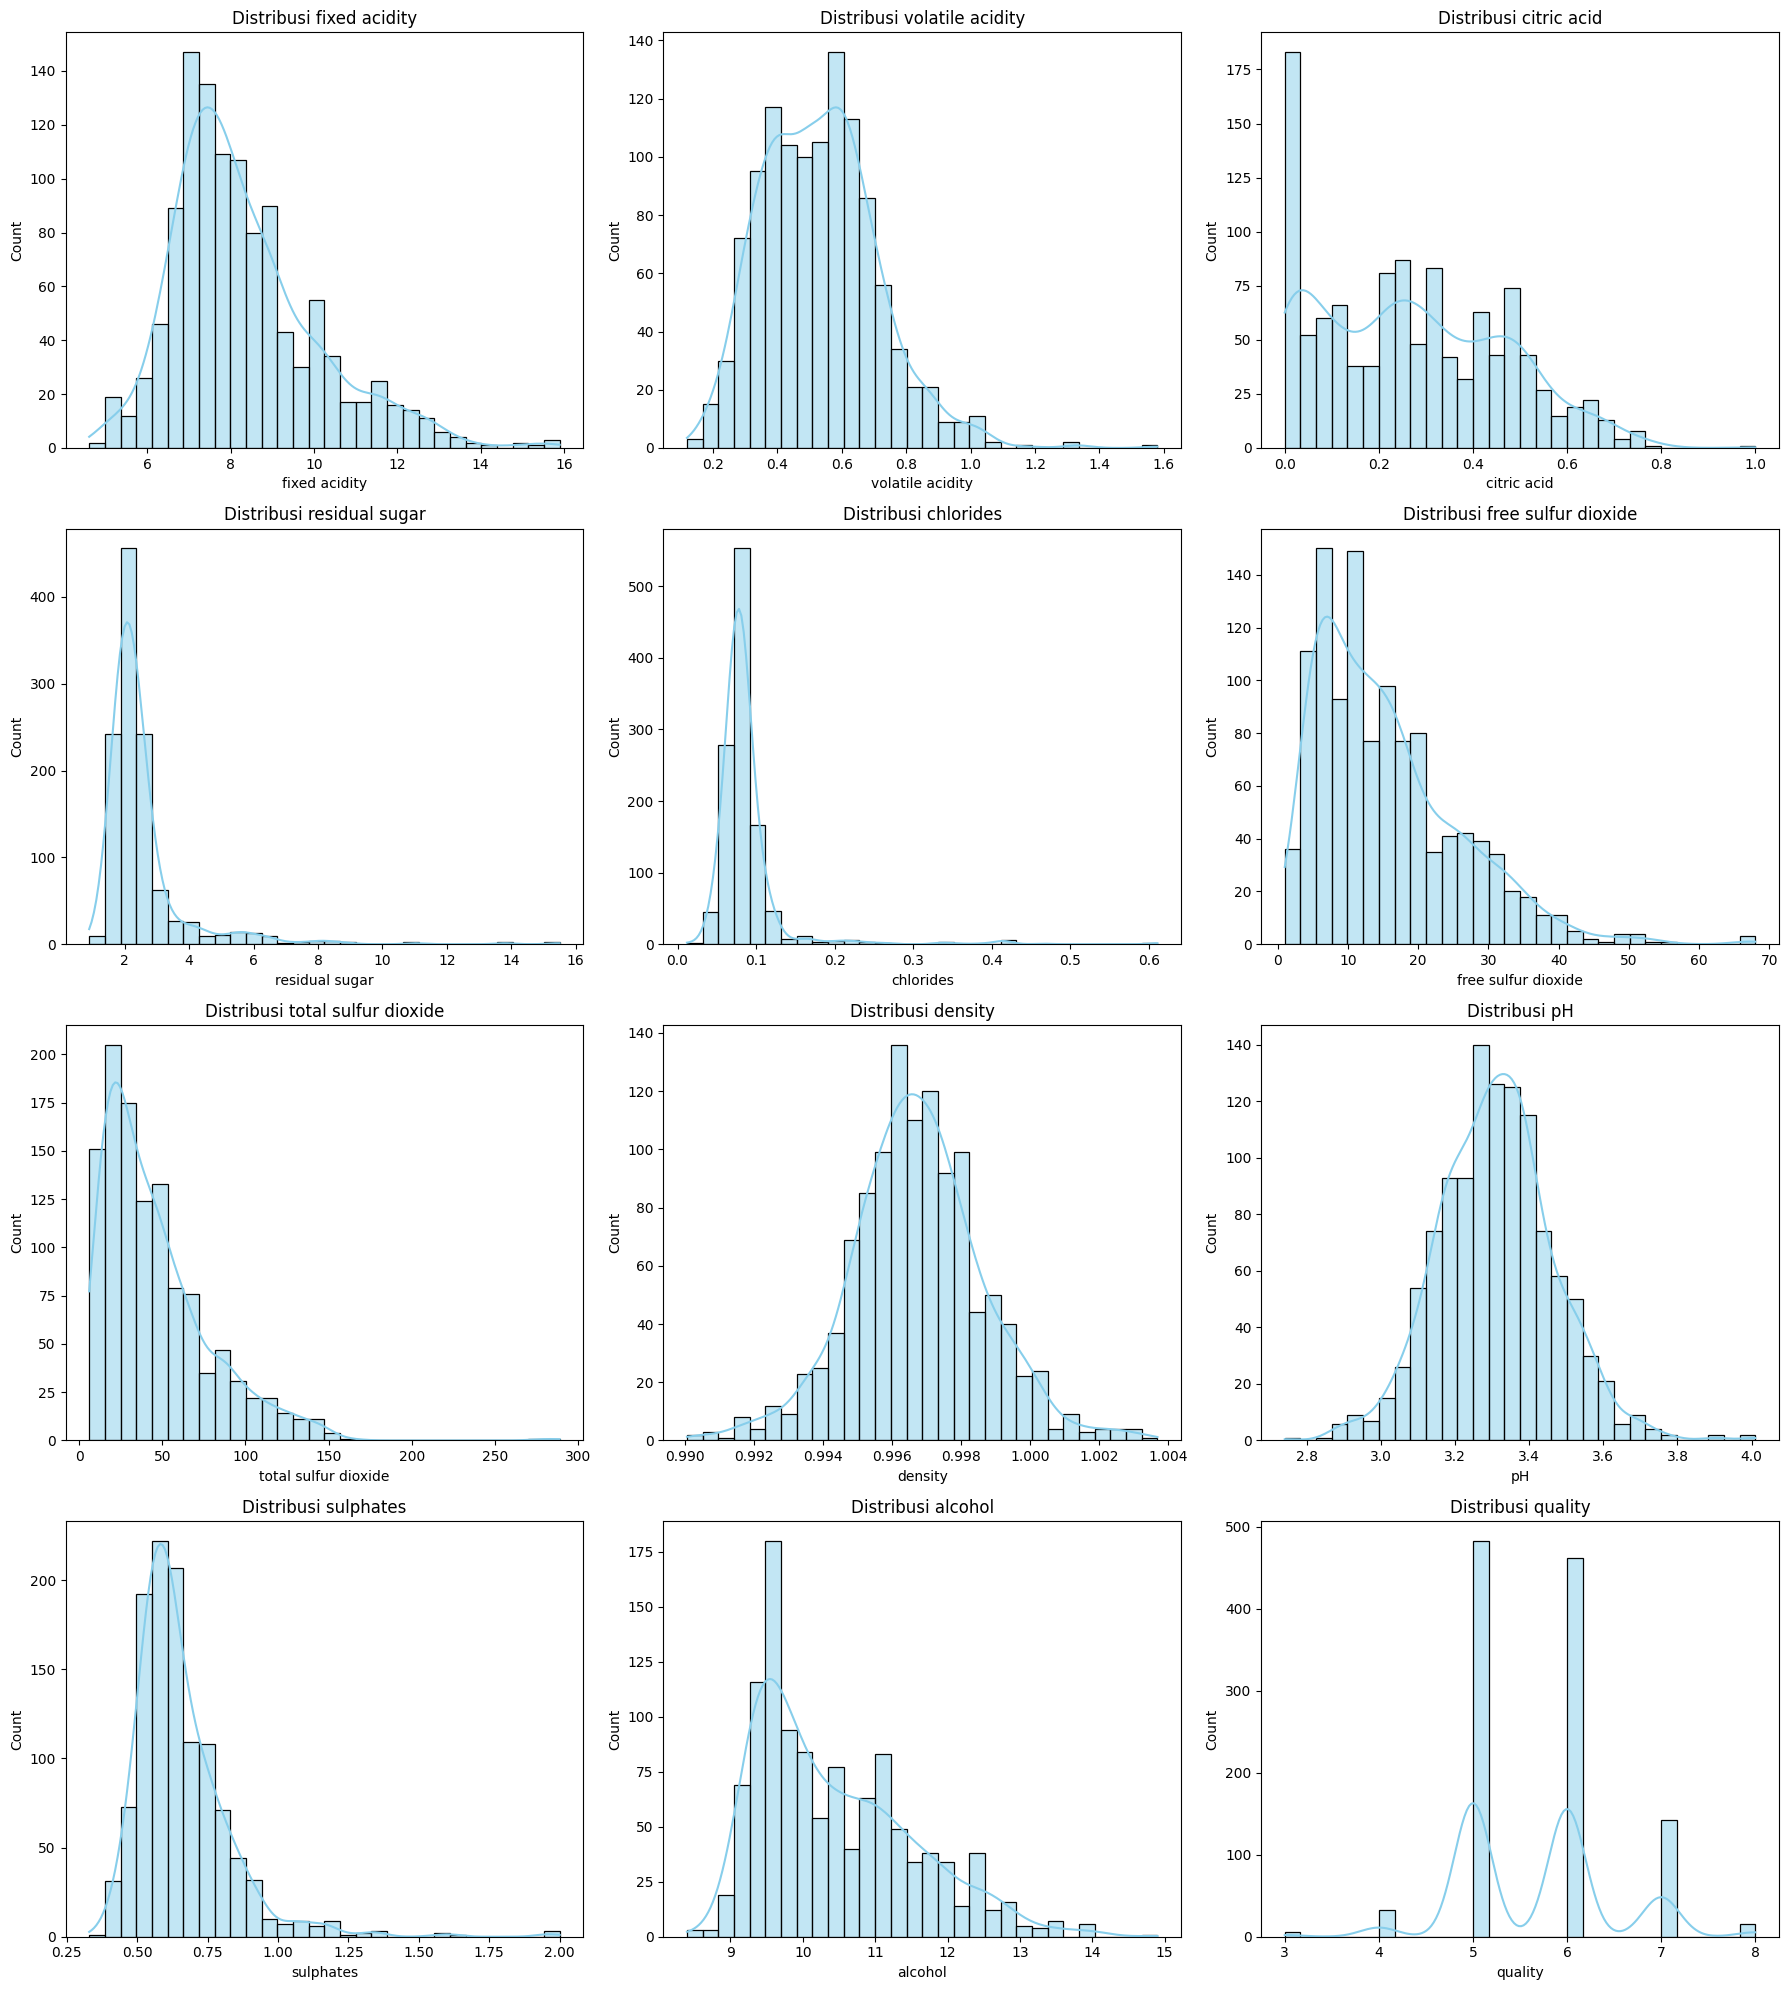

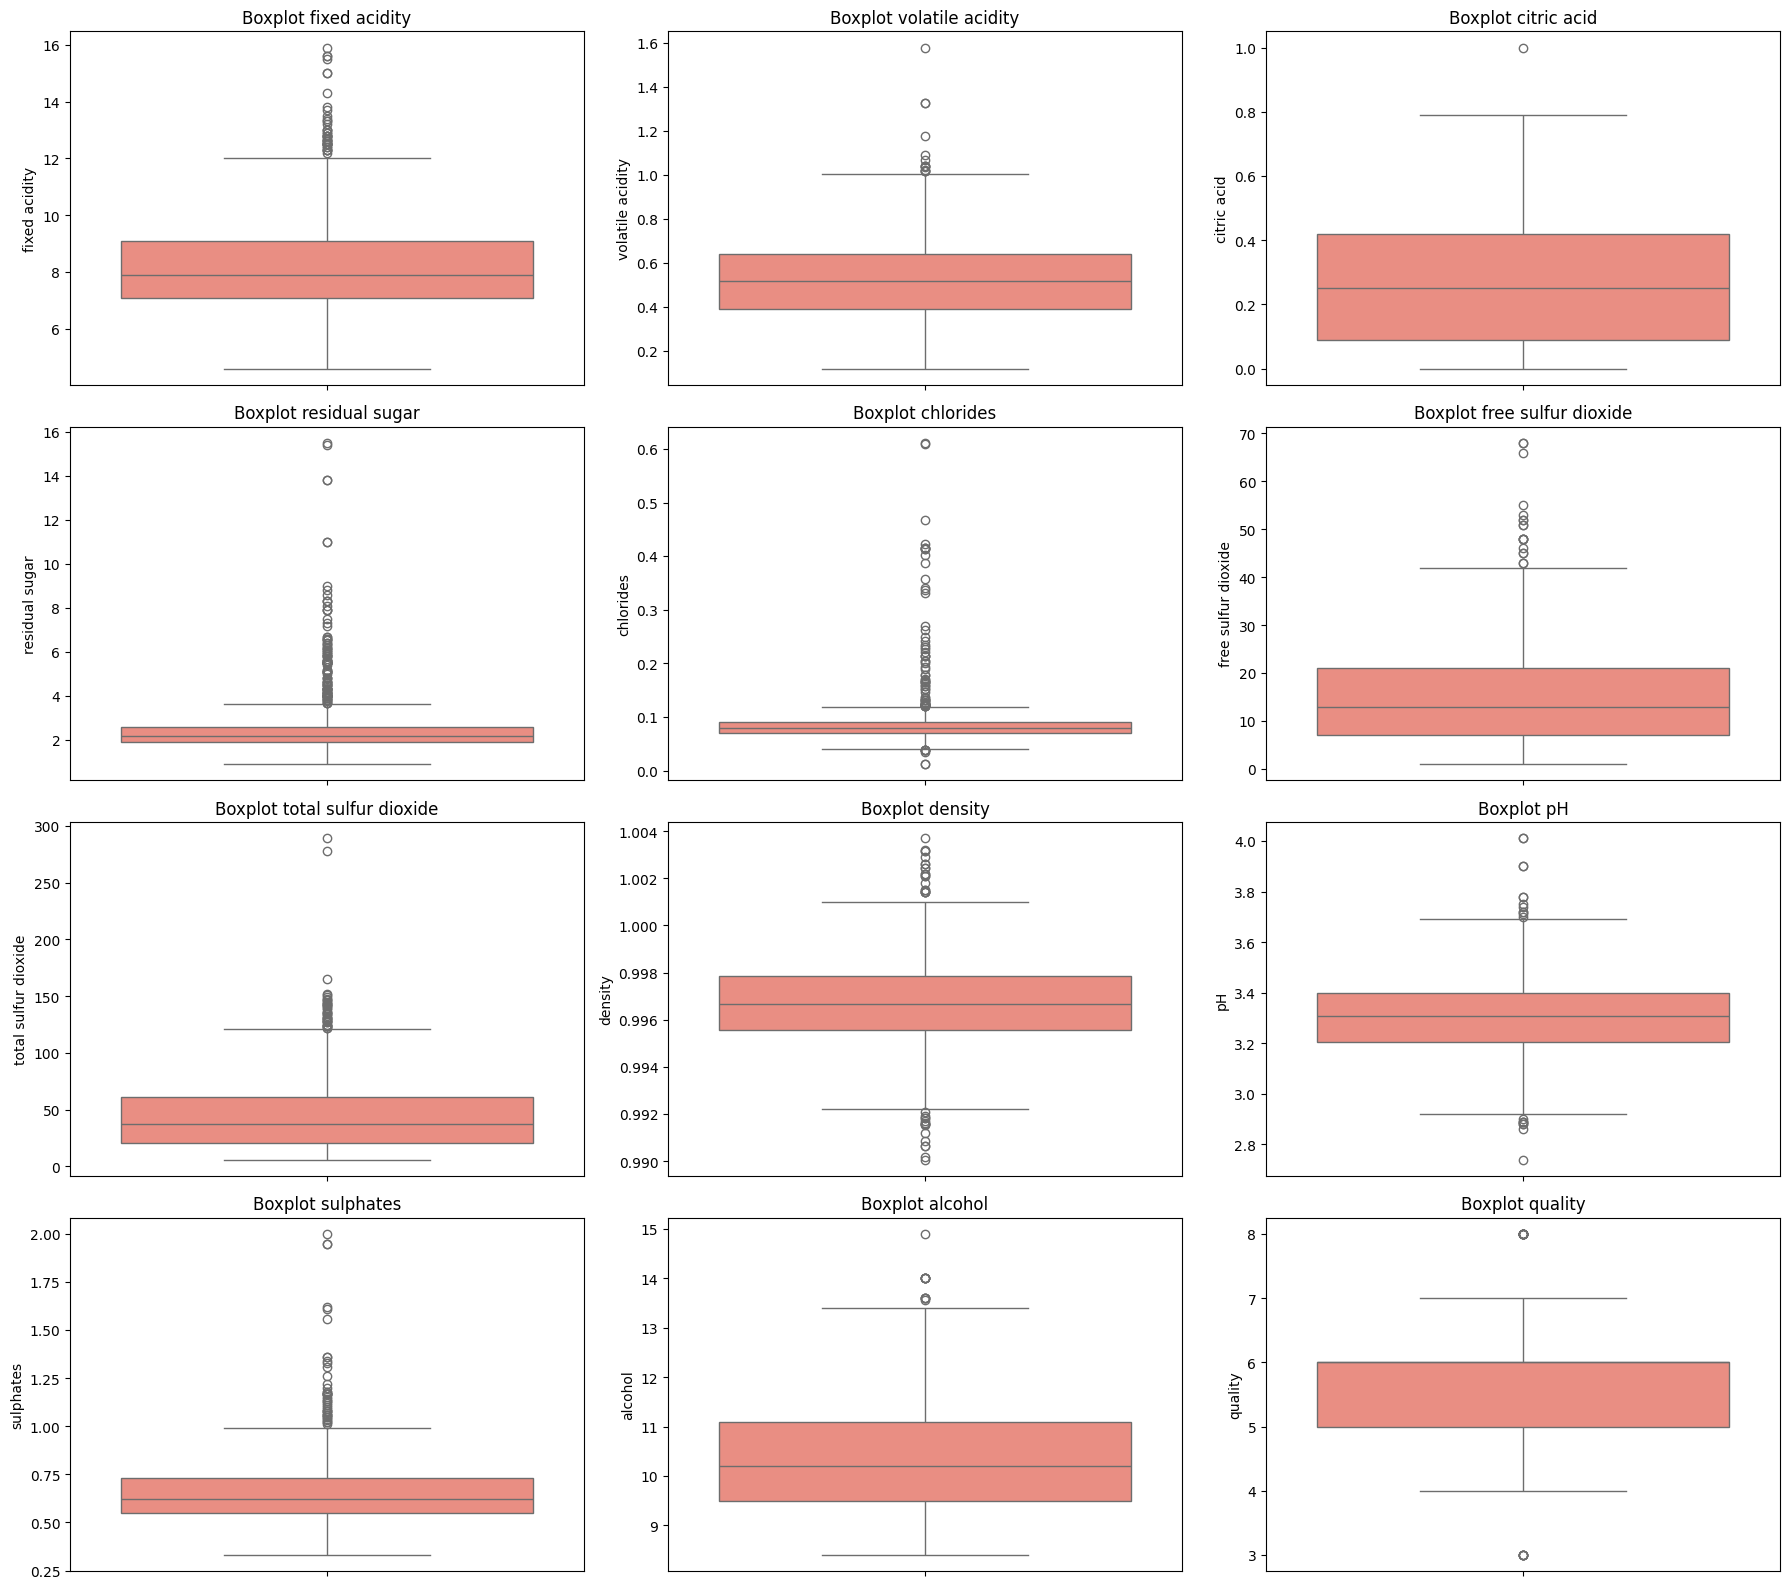

In [101]:
print("\n📈 Distribusi Histogram & Boxplot Fitur Numerikal:")
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Visualisasi Distribusi Skor Kualitas Wine (Target Variable)
- digunakan untuk menghasilkan grafik countplot, yang menunjukkan distribusi jumlah sampel untuk setiap kategori skor kualitas wine (quality).


insight: Grafik countplot digunakan untuk menampilkan distribusi jumlah sampel berdasarkan skor kualitas wine (quality). Visualisasi ini membantu memahami seberapa sebar data target (variabel kualitas), apakah seimbang atau condong pada nilai tertentu.


 Distribusi Target Variabel (quality):


<ipython-input-102-fbe4f73c102e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_feature, data=df, palette="viridis")


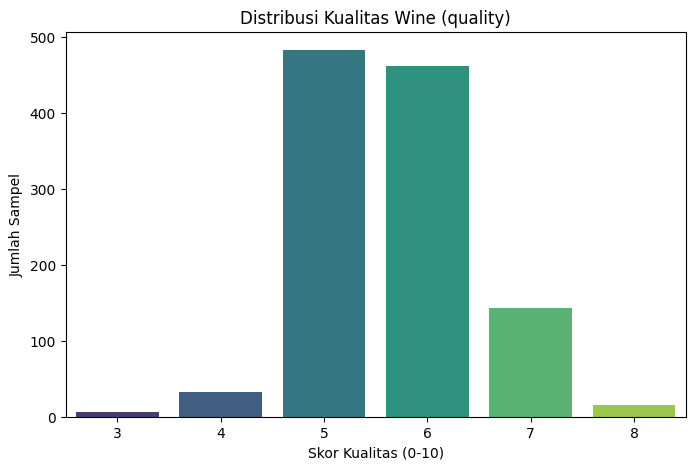

In [102]:
print("\n Distribusi Target Variabel (quality):")
plt.figure(figsize=(8, 5))
sns.countplot(x=target_feature, data=df, palette="viridis")
plt.title("Distribusi Kualitas Wine (quality)")
plt.xlabel("Skor Kualitas (0-10)")
plt.ylabel("Jumlah Sampel")
plt.show()

Mengecek setiap kategori kualitas

insight: istribusi kategori kualitas wine menunjukkan bahwa sebagian besar sampel memiliki skor kualitas 5 (483 sampel), diikuti oleh skor 6 (462 sampel) dan 4 (33 sampel). Ini memberikan gambaran bahwa mayoritas sampel memiliki kualitas menengah.

In [103]:
print("\n📋 Jumlah Masing-Masing Kategori Kualitas:")
print(df[target_feature].value_counts().sort_index())


📋 Jumlah Masing-Masing Kategori Kualitas:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


## Multivariate Analysis

Heatmap Korelasi Antar Fitur Numerik
- Korelasi positif atau negatif dapat memberikan informasi berharga untuk pemodelan prediktif, misalnya, jika beberapa fitur memiliki korelasi tinggi, itu bisa menunjukkan bahwa beberapa fitur mungkin redundan atau sangat berhubungan satu sama lain.

insight: heatmap korelasi memberikan gambaran yang jelas mengenai hubungan antar fitur numerik dalam dataset. Korelasi yang tinggi antara beberapa fitur, seperti fixed acidity dan citric acid, menunjukkan adanya hubungan yang kuat yang bisa menandakan informasi yang tumpang tindih atau redundansi. Pemahaman ini sangat penting dalam proses pemilihan fitur (feature selection), karena fitur yang sangat berkorelasi dapat menyebabkan multikolinearitas dalam model prediktif, yang berdampak pada kestabilan dan interpretabilitas model. Dengan demikian, analisis ini membantu menyederhanakan model, meningkatkan performa, dan memastikan bahwa hanya fitur yang paling relevan yang digunakan dalam proses analitik atau pemodelan lebih lanjut.

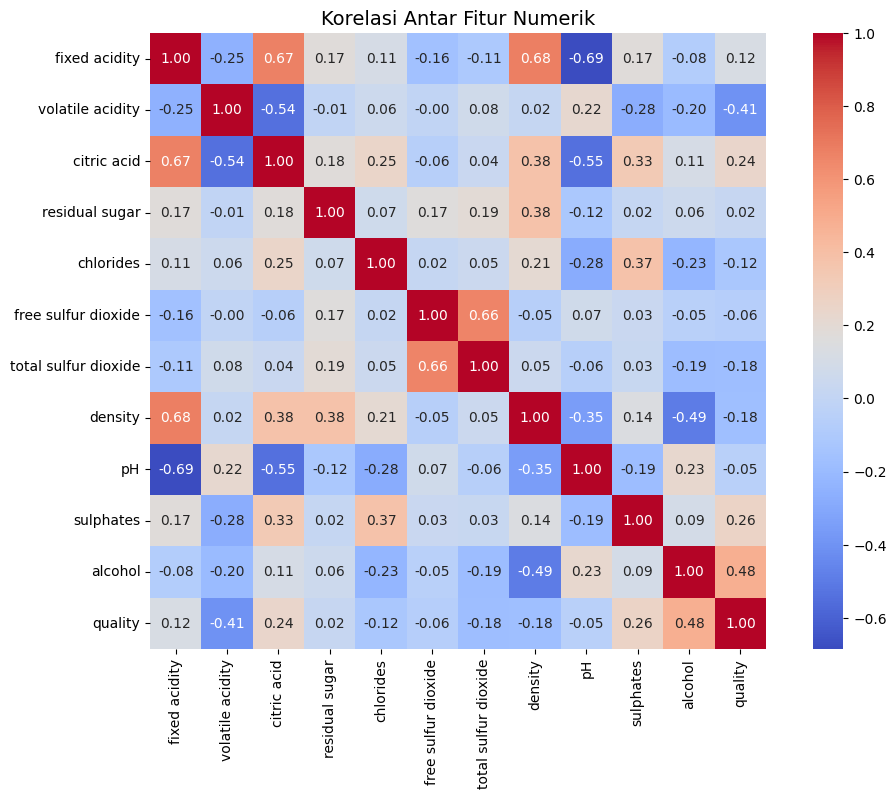

In [104]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Korelasi Antar Fitur Numerik', fontsize=14)
plt.show()


Visualisasi Pairplot Beberapa Fitur vs Quality
- Visualisasi ini memberikan wawasan tentang bagaimana fitur-fitur kimia terkait dengan kualitas wine.

- Pairplot memungkinkan untuk melihat pola hubungan antar fitur dan bagaimana kualitas wine berperan dalam distribusi data. Ini bisa memberikan indikasi apakah ada hubungan yang kuat antara fitur tertentu dan kualitas wine.

insight: Dengan menggunakan pairplot, kita bisa melihat distribusi data dan pola hubungan antar fitur yang berbeda. Pairplot juga mengelompokkan data berdasarkan kualitas wine, memberikan indikasi apakah ada korelasi kuat antara fitur tertentu dengan kualitas wine.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


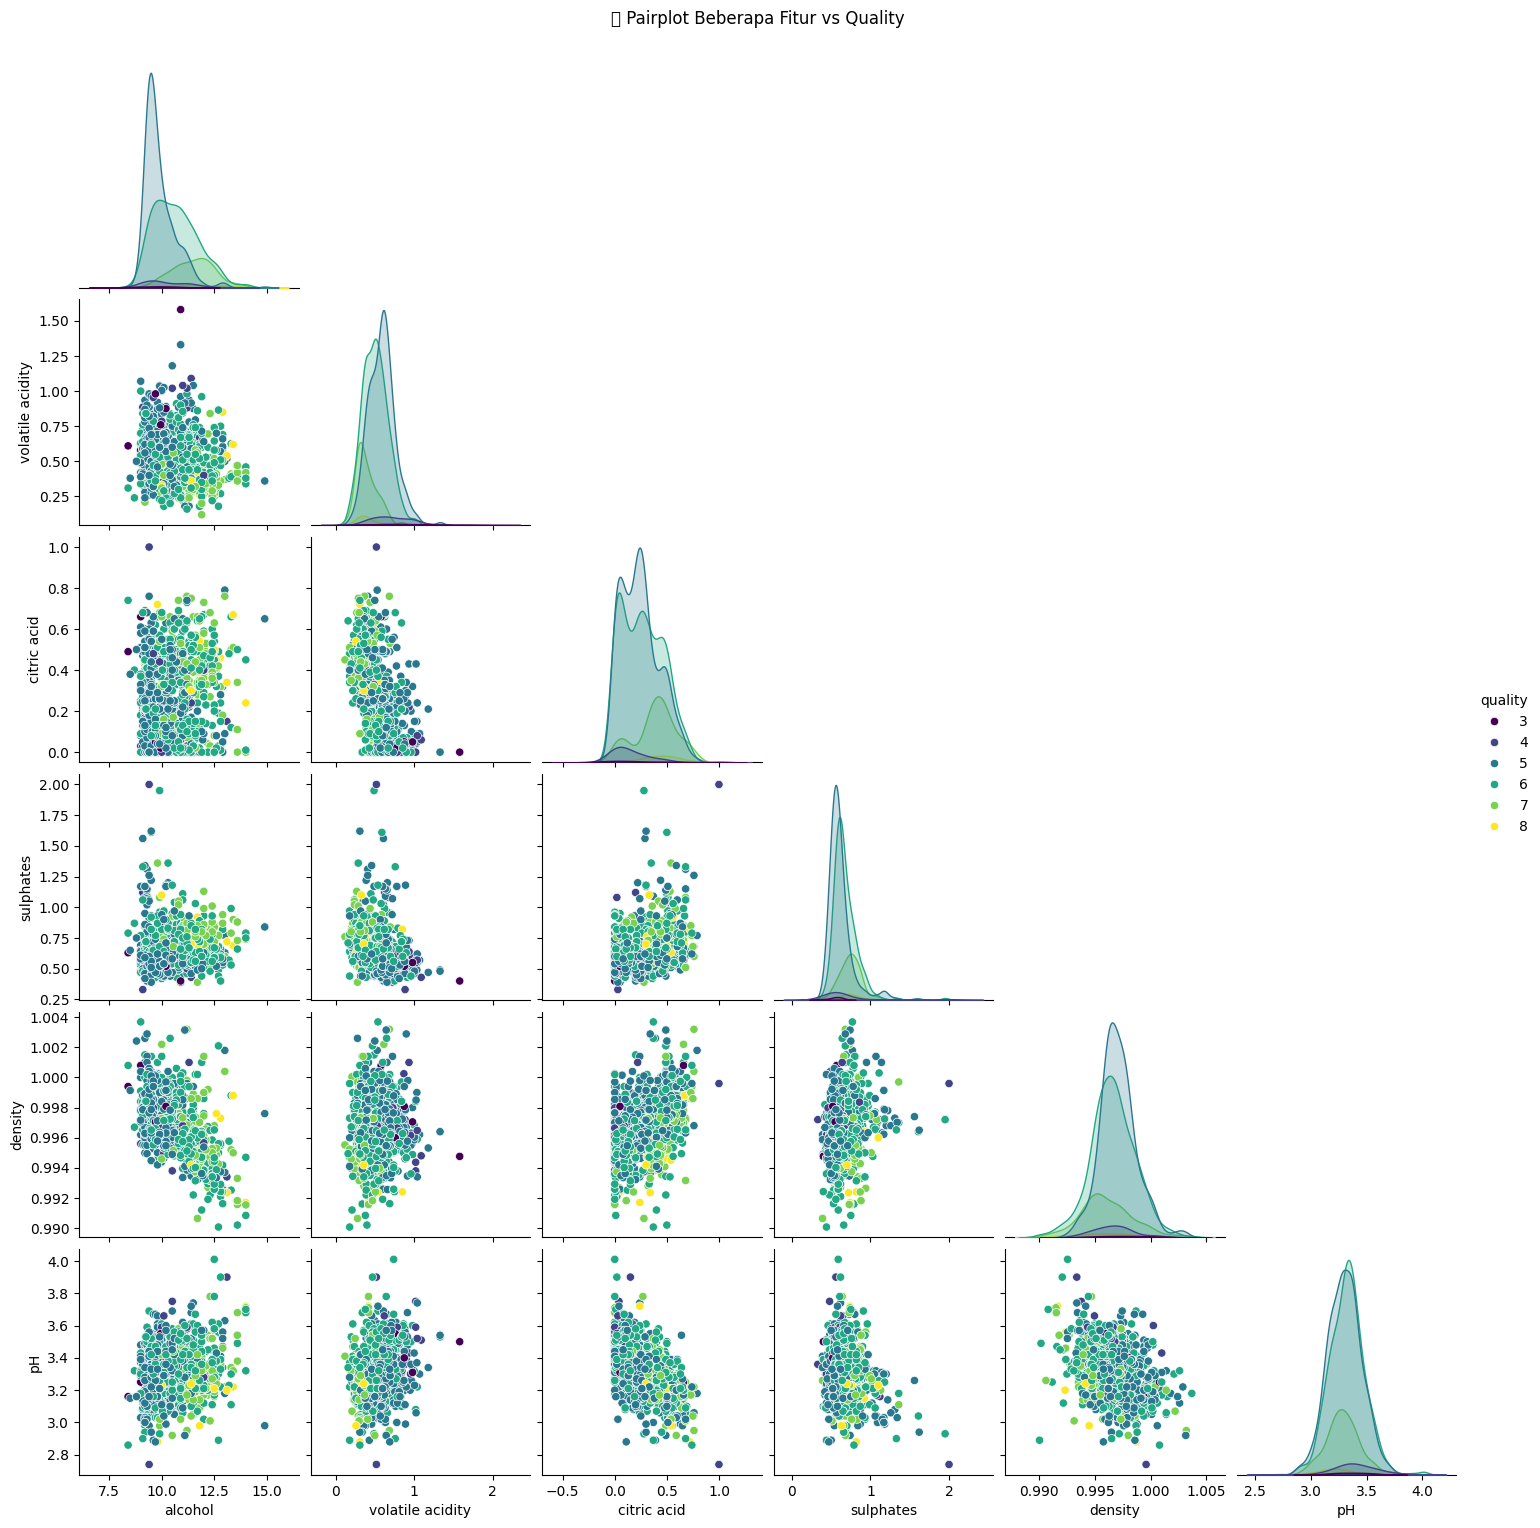

In [105]:
selected_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'density', 'pH', 'quality']
sns.pairplot(df[selected_features], hue='quality', palette='viridis', corner=True)
plt.suptitle("📊 Pairplot Beberapa Fitur vs Quality", y=1.02)
plt.show()

Grafik berikut menunjukkan hubungan antara fitur-fitur kimia pada wine dan kualitasnya. Terlihat bahwa fitur seperti density dan alcohol menunjukkan perubahan yang relatif konsisten seiring dengan peningkatan kualitas wine. Sebaliknya, fitur seperti residual sugar dan free sulfur dioxide memiliki distribusi yang lebih bervariasi pada setiap kategori kualitas, dengan banyak outliers yang menunjukkan adanya variasi yang lebih besar pada skor kualitas tertentu.

insight: Grafik boxplot menunjukkan hubungan antara fitur kimia wine dan kualitasnya. Terlihat bahwa fitur seperti density dan alcohol relatif konsisten seiring perubahan kualitas wine. Sebaliknya, fitur seperti residual sugar dan free sulfur dioxide menunjukkan variasi lebih besar dengan banyaknya outliers, mengindikasikan adanya data ekstrem pada kualitas wine tertentu.

Boxplot Setiap Fitur terhadap Target 'quality':


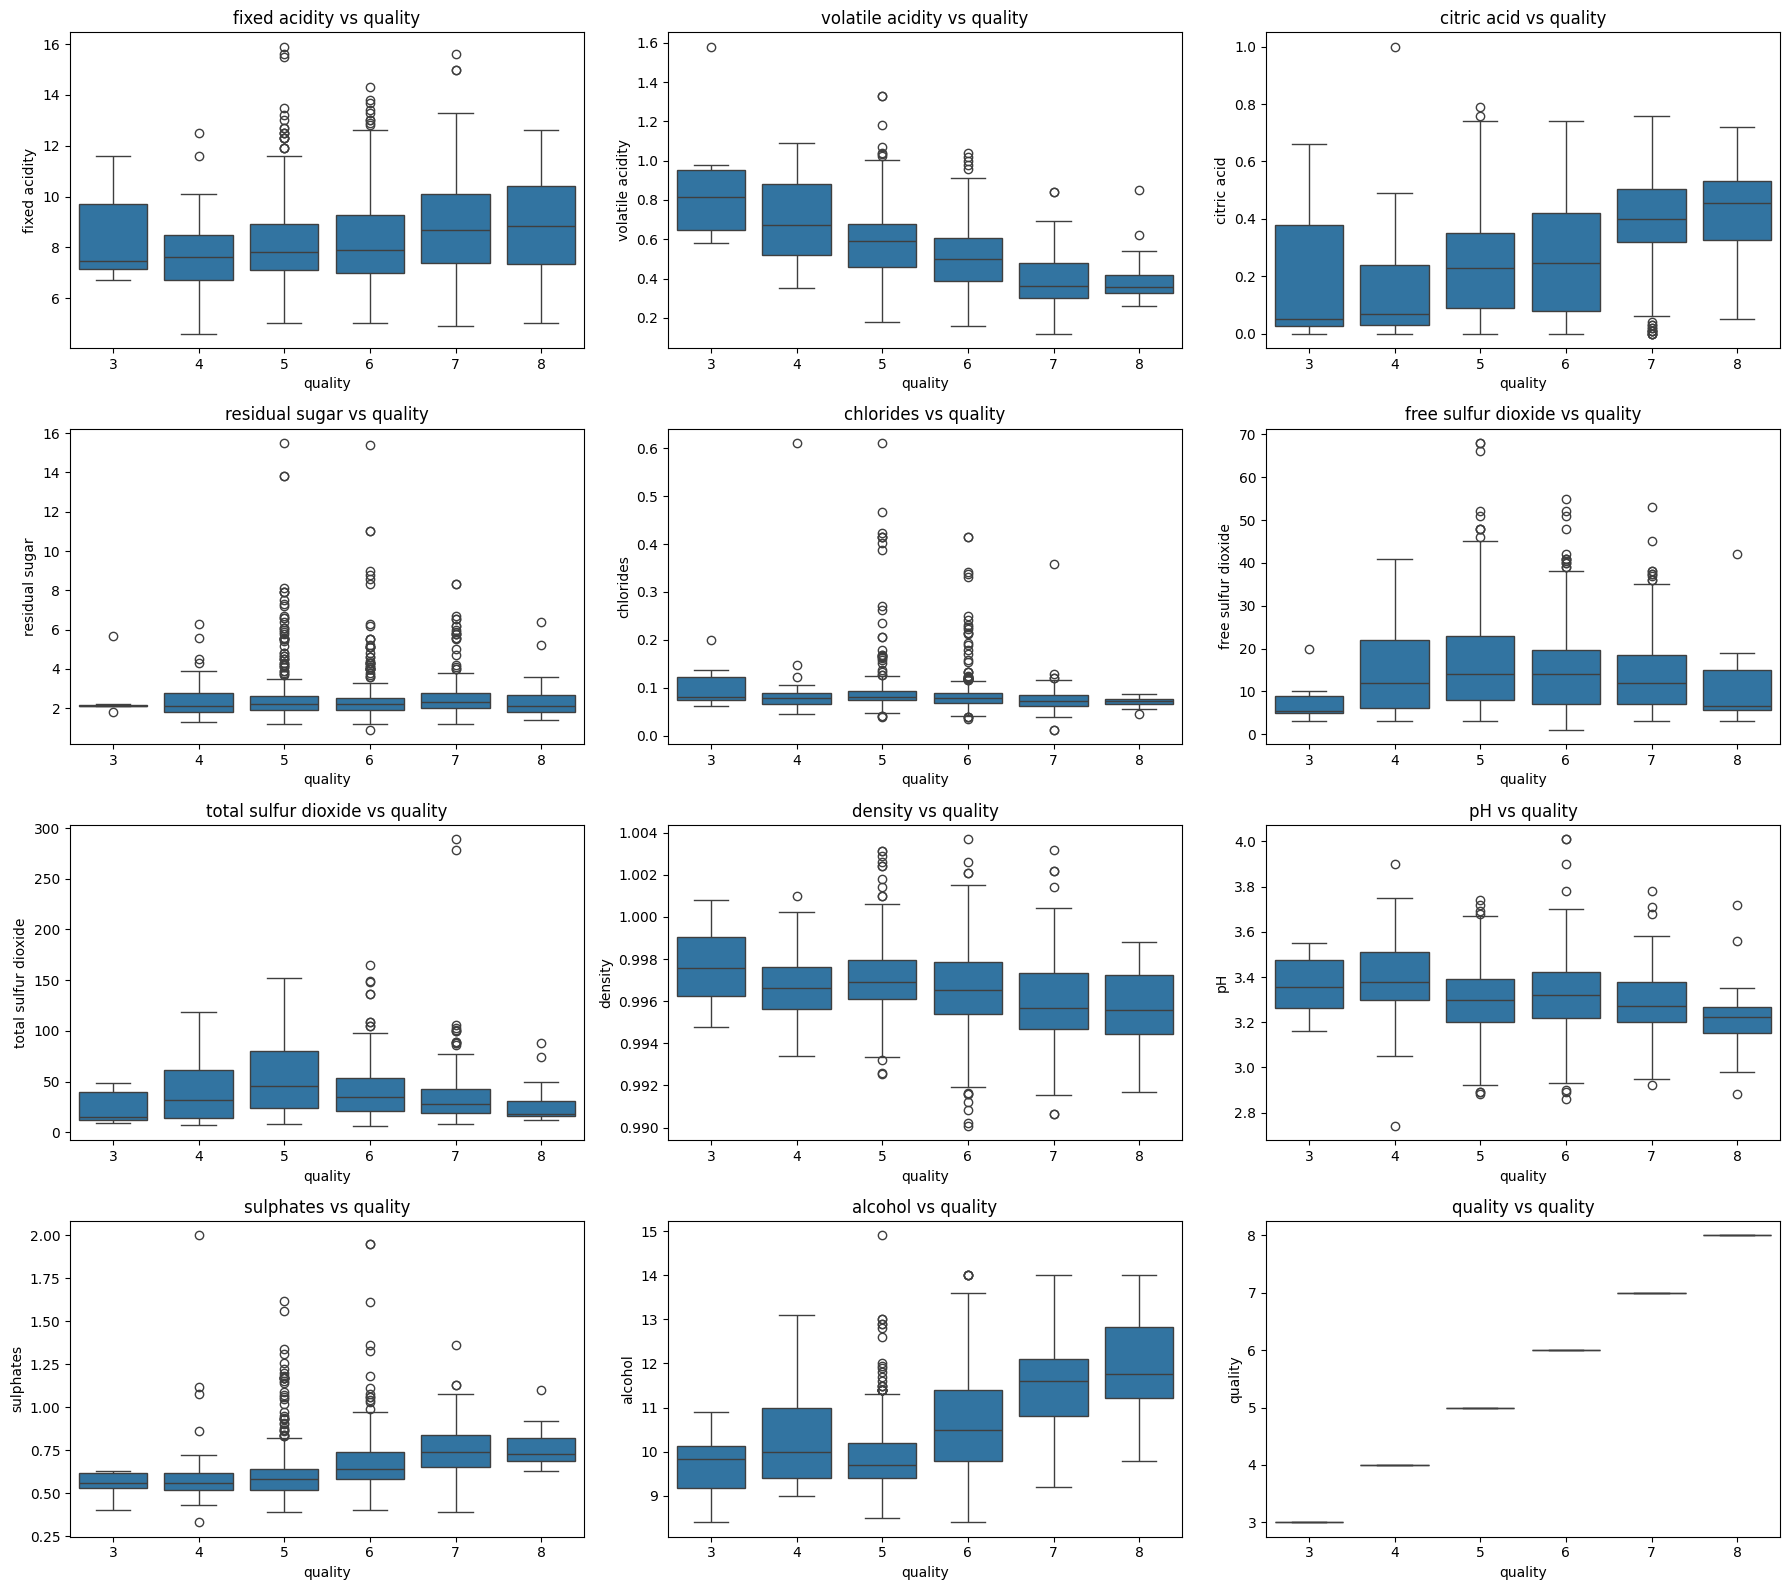

In [106]:
print("Boxplot Setiap Fitur terhadap Target 'quality':")
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=target_feature, y=col, data=df)  # Hapus palette
    plt.title(f'{col} vs quality')
plt.tight_layout()
plt.show()


# **3. Data Preparation**


## Encoding Fitur Kategori

Memilih kolom-kolom dalam dataset yang memiliki tipe data kategori atau objek (seperti string). Fungsi select_dtypes(include=['object', 'category']) digunakan untuk menyaring kolom-kolom ini dan menghasilkan daftar nama kolom kategori yang ada. Setelah itu, kolom kategori yang teridentifikasi disimpan dalam variabel categorical_cols, yang kemudian digunakan untuk pemrosesan lebih lanjut.

insight: Kolom dengan tipe data kategori atau objek (seperti string) dipilih menggunakan select_dtypes untuk mengidentifikasi kolom yang akan di-encode. Tetapi tidak ada fitur kategori yang dipilih.

In [107]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Fitur kategori:", categorical_cols)

Fitur kategori: []


melakukan grouping data berdasarkan nilai kategori tersebut dan menghitung rata-rata quality untuk setiap grup kategori menggunakan groupby(col)['quality'].mean(). nilai rata-rata kualitas ini dipetakan kembali ke kolom kategori yang sesuai dengan map(target_mean), dan hasilnya disimpan dalam kolom baru yang dinamai <kolom>_encoded. Proses ini membantu mengubah kolom kategori menjadi representasi numerik berdasarkan rata-rata target (dalam hal ini, kualitas wine). Setelah encoding diterapkan, kode mencetak beberapa baris pertama dari kolom yang telah diencoding (<col>_encoded) dan kolom quality untuk memverifikasi apakah encoding berhasil diterapkan dengan benar.

insight: Proses encoding pada fitur kategori dilakukan dengan menggantikan nilai kategori dengan rata-rata nilai quality dari masing-masing kategori. Pendekatan ini, dikenal sebagai target encoding, menghasilkan representasi numerik yang lebih bermakna karena mempertimbangkan hubungan langsung antara kategori dan target. Setelah encoding, kolom baru seperti col_encoded dibuat, menggantikan nilai kategorikal asli dengan nilai numerik yang mencerminkan kualitas rata-rata. Proses ini mempermudah integrasi fitur kategori ke dalam model prediktif dan membantu meningkatkan akurasi model dengan memberikan informasi yang lebih relevan secara statistik.

In [108]:
for col in categorical_cols:
    target_mean = df.groupby(col)['quality'].mean()
    df[col + '_encoded'] = df[col].map(target_mean)

print(df[[*categorical_cols, *(col + '_encoded' for col in categorical_cols), 'quality']].head())

   quality
0        5
1        5
2        5
3        6
4        5


## Reduksi Dimensi dengan PCA

Menghapus kolom kategorikal dan kolom quality dari dataset df untuk menyisakan hanya fitur numerik. Kolom yang dihapus dimasukkan dalam categorical_cols dan quality.

insight: Kolom kategori dan kolom target (quality) dihapus dari dataset, menyisakan hanya fitur numerik. Fitur numerik ini dipersiapkan untuk tahap selanjutnya, yaitu standarisasi dan analisis komponen utama (PCA).

In [109]:
features = df.drop(columns=categorical_cols + ['quality'])

Membuat objek StandardScaler, yang digunakan untuk melakukan standardisasi (penyusunan ulang skala) pada fitur numerik, sehingga setiap fitur memiliki mean = 0 dan standar deviasi = 1. Menerapkan standardisasi pada fitur numerik yang sudah dipilih (features) dengan fit_transform(), menghasilkan data yang sudah diskalakan (features_scaled).

insight: StandardScaler digunakan untuk menstandarisasi fitur numerik dan memastikan bahwa semua fitur berada dalam skala yang sama saat dianalisis lebih lanjut.

In [110]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Membuat objek PCA (Principal Component Analysis) untuk mengurangi dimensi data menjadi 2 komponen utama (n_components=2). Menerapkan PCA untuk mereduksi dimensi data yang sudah diskalakan menjadi dua komponen utama. Hasilnya disimpan dalam principal_components.

insight: PCA digunakan untuk mengurangi dimensi data dengan menyusun data ke dalam dua komponen utama (PC1 dan PC2), yang mempertahankan sebanyak mungkin informasi dari data asli dengan jumlah dimensi yang lebih sedikit.

In [111]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

Mengonversi hasil PCA menjadi DataFrame dengan dua kolom: PC1 dan PC2 yang mewakili dua komponen utama. Menambahkan kolom quality dari dataset asli ke DataFrame pca_df, untuk memudahkan analisis lebih lanjut berdasarkan kualitas wine.

insight: : Setelah PCA diterapkan, hasilnya (PC1 dan PC2) dimasukkan ke dalam DataFrame baru, mempermudah analisis lebih lanjut berdasarkan kualitas wine (quality).

In [112]:
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['quality'] = df['quality']

Visualisasi ini menunjukkan hubungan antara dua komponen utama PCA dari data wine, dengan warna yang menggambarkan kualitas wine.
- Titik yang lebih gelap menunjukkan kualitas yang lebih rendah, sedangkan titik yang lebih terang menunjukkan kualitas yang lebih tinggi.
- Ini memberikan gambaran umum tentang bagaimana data wine tersebar di ruang dua dimensi setelah reduksi dimensi dengan PCA.\

insight: PCA Scatter Plot memberikan visualisasi dua dimensi dari data setelah reduksi dimensi menggunakan Principal Component Analysis (PCA). Visualisasi ini memungkinkan pengamatan pola atau klaster dalam data berdasarkan dua komponen utama yang menangkap varians terbesar. Penggunaan gradasi warna sebagai representasi kualitas wine membantu mengidentifikasi distribusi dan potensi pemisahan antar kelas kualitas. Warna yang lebih terang menunjukkan kualitas yang lebih tinggi, sedangkan warna lebih gelap menandakan kualitas rendah. Pola warna yang membentuk klaster menunjukkan bahwa PCA berhasil mengungkap struktur data yang mungkin berguna untuk klasifikasi atau segmentasi dalam analisis lanjutan.

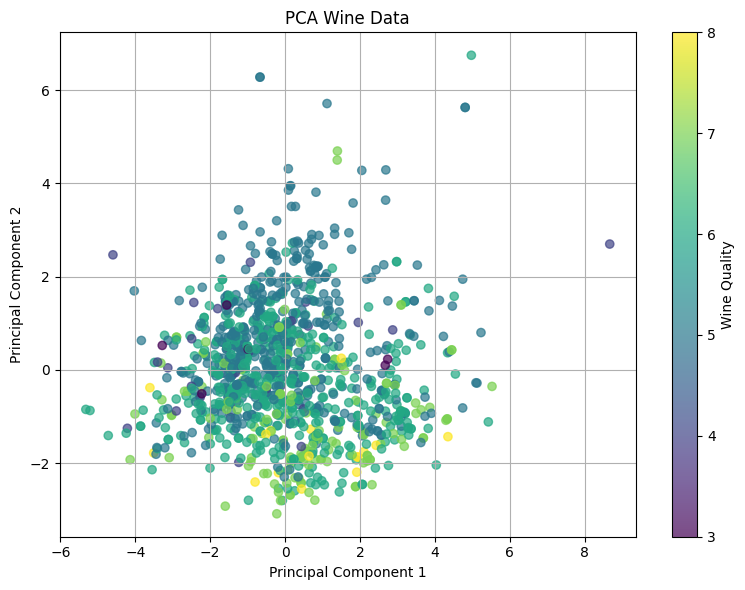

In [113]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['quality'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Wine Data')
plt.grid(True)
plt.tight_layout()
plt.show()

- Pairplot ini memberikan gambaran visual yang jelas tentang bagaimana kualitas wine tersebar dalam ruang dua dimensi setelah dilakukan reduksi dimensi dengan PCA.
- Titik dengan warna yang lebih terang (lebih tinggi kualitas) cenderung berkumpul di area tertentu dari komponen utama, sementara titik dengan warna lebih gelap menunjukkan kualitas yang lebih rendah.

insight: Visualisasi pairplot antara komponen utama PCA (PC1 dan PC2) dan kualitas wine menunjukkan hubungan yang jelas antara distribusi data dan level kualitas. Warna titik digunakan sebagai indikator kualitas, di mana warna lebih terang merepresentasikan kualitas tinggi dan warna gelap kualitas rendah. Titik-titik dengan kualitas tinggi tampak lebih terkonsentrasi dalam area tertentu pada ruang komponen utama, sedangkan kualitas rendah tersebar lebih luas. Hal ini menunjukkan bahwa hasil reduksi dimensi melalui PCA berhasil menangkap informasi penting dalam data, dan kualitas wine cenderung dapat dipisahkan atau diprediksi berdasarkan distribusi dalam ruang komponen utama tersebut. Visualisasi ini memperkuat potensi PCA sebagai alat bantu untuk eksplorasi dan klasifikasi data.

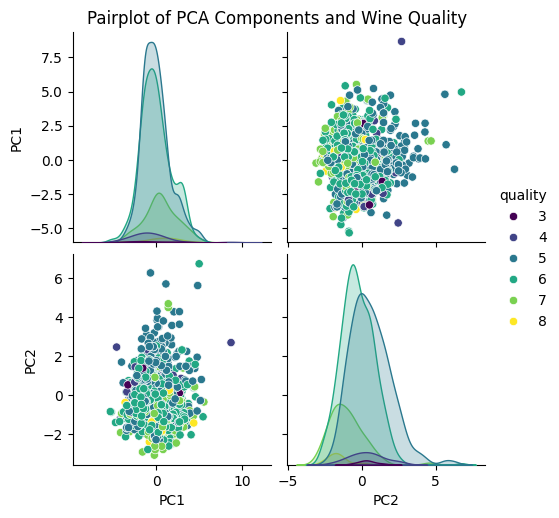

In [114]:
sns.pairplot(pca_df, hue='quality', palette='viridis')
plt.suptitle('Pairplot of PCA Components and Wine Quality', y=1.02)
plt.show()

## Train-Test-Split

Memisahkan fitur (X) dan target (y) dalam dataset.
- Menghapus kolom quality dari dataset df untuk membuat X yang berisi semua fitur numerik yang akan digunakan sebagai input untuk model.
- Menyimpan kolom quality dalam variabel y yang akan digunakan sebagai target untuk model (nilai yang ingin diprediksi).

insight: Kolom quality dihapus dari dataset untuk membuat X yang berisi semua fitur numerik sebagai input model, sementara kolom quality disimpan dalam y sebagai target yang ingin diprediksi oleh model.

In [115]:
X = df.drop(["quality"], axis=1)
y = df["quality"]

Membagi Data menjadi Train dan Test
- 80 Pelatihan
- 20 Pengujian
- 20 testing
- Membagi data menjadi data pelatihan dan pengujian dengan menjaga proporsi distribusi label yang seimbang.

insight: Ini dilakukan dengan menggunakan fungsi train_test_split, memastikan bahwa model dilatih dan diuji dengan distribusi yang konsisten.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_split shape:", X_test.shape)


X_train shape: (914, 11)
X_test shape: (229, 11)
X_split shape: (229, 11)


Standarisasi Data
- Melakukan standarisasi pada data pelatihan dan pengujian, yang penting untuk algoritma yang sensitif terhadap skala data.

insight:  Proses ini penting untuk algoritma yang sensitif terhadap skala data, seperti regresi atau KNN, untuk meningkatkan kinerja model.

In [117]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## modeling


Model Naive Bayes memberikan hasil yang cukup baik, namun masih ada ruang untuk perbaikan, terutama dalam memprediksi beberapa kelas dengan jumlah sampel yang sedikit. Akurasi model sebesar 58.51% menunjukkan bahwa model ini cukup berhasil dalam memprediksi kualitas wine, meskipun model lebih efektif pada kelas-kelas dengan jumlah sampel yang lebih banyak (seperti kualitas 5 dan 6).

insight: Model Naive Bayes diuji dengan data pelatihan dan pengujian, memberikan hasil akurasi sekitar 58.5%. Meskipun model ini memiliki performa yang rendah dengan skor presisi dan recall yang sangat kecil untuk sebagian besar kelas, akurasi keseluruhan menunjukkan kinerjanya dalam memprediksi kualitas wine.

In [118]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes")
print(classification_report(y_test, nb_preds))
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("-" * 40)

Naive Bayes
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.14      0.17         7
           5       0.77      0.64      0.70        97
           6       0.59      0.64      0.61        92
           7       0.33      0.38      0.35        29
           8       0.10      0.33      0.15         3

    accuracy                           0.59       229
   macro avg       0.33      0.36      0.33       229
weighted avg       0.61      0.59      0.59       229

Accuracy: 0.5851528384279476
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Random Forest memiliki akurasi yang lebih tinggi dibandingkan model Naive Bayes (58.51% sebelumnya).Namun, model ini masih kurang akurat dalam memprediksi kualitas wine untuk kelas yang lebih sedikit sampelnya (misalnya kualitas 3 dan 8). Hasil menunjukkan bahwa Random Forest memiliki potensi lebih besar untuk menangani data yang lebih kompleks dan imbalanced, dengan weighted average F1-score 0.69 dan macro average F1-score 0.34.

insight: Random Forest menghasilkan akurasi 71.6% dengan nilai presisi dan recall yang lebih baik dibandingkan Naive Bayes. Ini menunjukkan model yang lebih kuat dalam klasifikasi kualitas wine dengan prediksi yang lebih tepat di sebagian besar kelas. Random Forest mengatasi masalah ketidakseimbangan kelas lebih baik dengan skor yang lebih tinggi dalam kelas 6 dan 5.

In [119]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("-" * 40)

Random Forest
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.85      0.79        97
           6       0.69      0.74      0.71        92
           7       0.74      0.48      0.58        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.68      0.72      0.69       229

Accuracy: 0.7161572052401747
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Decision Tree menunjukkan akurasi yang lebih rendah dibandingkan model
Random Forest (71.61%) dan lebih baik dari Naive Bayes (58.51%). Precision dan recall rendah untuk beberapa kelas, terutama untuk kualitas wine yang lebih jarang, seperti kualitas 3 dan 8. Meskipun model ini memberikan hasil yang lebih rendah, model Decision Tree masih memberikan wawasan tentang bagaimana fitur-fitur tertentu (seperti quality) mempengaruhi prediksi.

insight: Decision Tree memberikan akurasi 62.8%, namun dengan presisi dan recall yang rendah di beberapa kelas, terutama untuk kualitas 3. Model ini cukup sederhana dan dapat lebih ditingkatkan dengan hyperparameter tuning atau teknik pengurangan overfitting seperti pruning.

In [120]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree")
print(classification_report(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("-" * 40)


Decision Tree
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.14      0.15         7
           5       0.68      0.71      0.70        97
           6       0.63      0.61      0.62        92
           7       0.58      0.62      0.60        29
           8       0.00      0.00      0.00         3

    accuracy                           0.63       229
   macro avg       0.34      0.35      0.34       229
weighted avg       0.62      0.63      0.62       229

Accuracy: 0.62882096069869
----------------------------------------


Logistic Regression memberikan hasil yang lebih rendah dibandingkan dengan Random Forest (71.61% akurasi), namun lebih baik dari Naive Bayes (58.51% akurasi). Model ini cenderung lebih efektif pada kelas yang lebih sering muncul (seperti kualitas 5 dan 6) tetapi kesulitan memprediksi kelas dengan jumlah sampel rendah (seperti kualitas 3 dan 8). Akurasi 65.05% menunjukkan bahwa model memiliki kinerja sedang pada dataset ini.

insight:  Logistic Regression menunjukkan akurasi 65.6%, tetapi dengan performa yang sangat rendah pada kelas kualitas 3. Skor presisi dan recall secara keseluruhan juga menunjukkan kekurangan dalam memprediksi kelas tertentu.

In [121]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, lr_preds))
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("-" * 40)

Logistic Regression
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.80      0.76        97
           6       0.61      0.70      0.65        92
           7       0.41      0.24      0.30        29
           8       0.00      0.00      0.00         3

    accuracy                           0.65       229
   macro avg       0.29      0.29      0.29       229
weighted avg       0.61      0.65      0.62       229

Accuracy: 0.6506550218340611
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

## Evaluasi Model

Menampilkan Classification Report dalam DataFrame
- menunjukkan metrik klasifikasi untuk setiap kelas (accuracy, precision, recall, f1-score) serta support untuk setiap kelas, dan juga macros avg serta weighted avg untuk keseluruhan performa model.

insight: menggambarkan performa keseluruhan model dengan menggunakan rata-rata tertimbang dari metrik-metrik seperti presisi, recall, dan F1-score. Skor F1 yang lebih tinggi menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam mengklasifikasikan kualitas wine, meskipun masih ada kelas tertentu yang prediksinya kurang akurat, terutama pada metrik presisi.

In [122]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("\n=== Ringkasan Skor (Random Forest - weighted average) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== Ringkasan Skor (Random Forest - weighted average) ===
Accuracy : 0.7162
Precision: 0.6822
Recall   : 0.7162
F1-Score : 0.6939


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [123]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("\n=== Ringkasan Skor (Naive Bayes - weighted average) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== Ringkasan Skor (Naive Bayes - weighted average) ===
Accuracy : 0.5852
Precision: 0.6109
Recall   : 0.5852
F1-Score : 0.5940


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [124]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("\n=== Ringkasan Skor (Decision Tree - weighted average) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== Ringkasan Skor (Decision Tree - weighted average) ===
Accuracy : 0.6288
Precision: 0.6208
Recall   : 0.6288
F1-Score : 0.6245


In [125]:
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("\n=== Ringkasan Skor (Logistic Regression - weighted average) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")



=== Ringkasan Skor (Logistic Regression - weighted average) ===
Accuracy : 0.6507
Precision: 0.6058
Recall   : 0.6507
F1-Score : 0.6235


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression
Label 2 dan 3 menunjukkan hasil yang paling akurat, masing-masing:
Class 2: 78 benar, 17 salah ke class 3
Kelas 3: 64 benar, 22 salah.
Ini menunjukkan bahwa model cukup akurat dalam membedakan dua kelas utama ini.
Masih ada kekacauan antara kelas 2 dan 3, dan beberapa kelas kecil (0, 1, 4, 5) memiliki jumlah data yang sangat sedikit dan juga salah klasifikasi.


Decision Tree
Bisa menangkap lebih banyak variasi label daripada regresi logistik.
Class 2: 69 benar, class 3: 56 benar (masih dominan)
Overfitting sering terjadi: Kelas 3 terdistribusi lebih luas ke Kelas 2, 4, dan 5 dibandingkan dengan Logistic Regression.
Klasifikasi Kelas 5 seringkali salah—tidak ada prediksi yang tepat untuk Kelas 5.

Random Forest
Di antara keempat model tersebut, ini adalah yang memiliki kinerja terbaik:
Dalam kelas 2, 82 benar, dan hanya 14 di kelas 3.
Kelas 3: 68 benar, 21 lebih dari Kelas 2.
Prediksi untuk Kelas 1 dan 4 juga cukup akurat.
Karena Random Forest menggabungkan berbagai pilihan pohon, hasilnya lebih stabil.
Dibandingkan dengan model lain, ada sedikit kesalahan di kelas minor (4 dan 5), tetapi masih ada.


Naive Bayes
Performa mudah, tetapi cepat dan efektif.
kelas 2 dan 3 memiliki tingkat akurasi yang rendah.
Di kelas 2, hanya 62 orang yang benar, dan 29 orang yang salah.
Kelas 3, hanya 59 yang benar; Kelas 2, 12 dan 17 masing-masing benar.
Fakta bahwa banyak label lain mengalami kesalahan klasifikasi menunjukkan bahwa asumsi independensi antar fitur tidak valid pada dataset ini.

insight:
Model Paling Akurat: Random Forest
Dengan jumlah prediksi benar tertinggi pada class mayor (2 dan 3) dan distribusi kesalahan paling kecil, Random Forest adalah model terbaik untuk data ini.


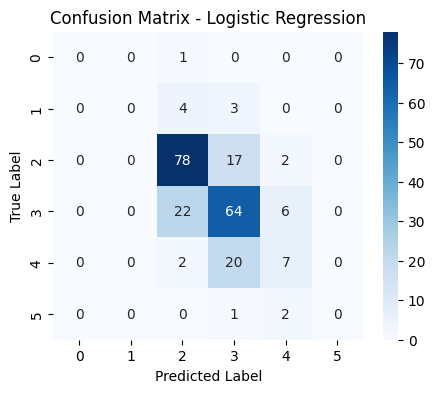

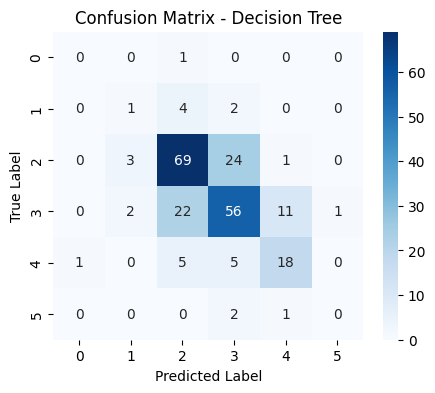

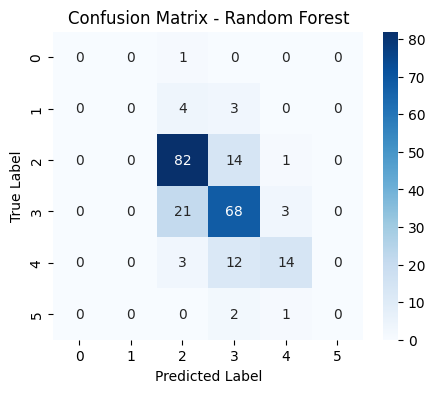

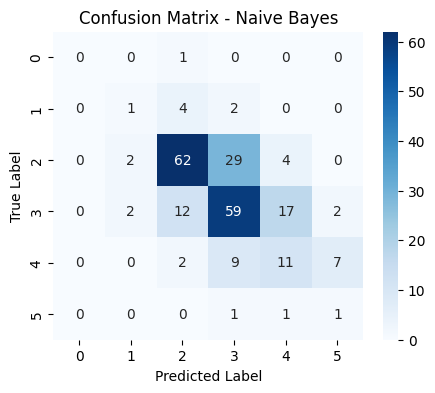

In [126]:
models = {
    "Logistic Regression": lr_preds,
    "Decision Tree": dt_preds,
    "Random Forest": rf_preds,
    "Naive Bayes": nb_preds
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()